![Python Logo](./img/python-logo-master-v3-TM-flattened_small.png)

# Financial Programming - IÉSEG, Lille - MBD 2024-2025
## Session 4 - Data Visualization with Python (cont.) (with solutions)

In [2]:
first_name = ''
last_name = ''

In [3]:
# Libraries
import numpy as np                        # Array, Calculation
import pandas as pd                       # DataFrame
import matplotlib.pyplot as plt           # Visualization
import plotly.express as px               # Visualization
import plotly.graph_objects as go         # Visualization
from datetime import datetime, timedelta  # Date-time

## Part 1: Plotly

### 1. A simple example

In [4]:
# Get sample data
import plotly
df = plotly.data.stocks()

# Visualize with plotly
import plotly.graph_objects as go

# Traces and Data
trace1 = go.Scatter(x=df['date'], y=df['GOOG'], mode='lines', name='GOOG')
trace2 = go.Scatter(x=df['date'], y=df['AAPL'], mode='lines+markers', name='AAPL')
data = [trace1, trace2]

# Layout
layout = go.Layout(title='Stock price 2018-2020', yaxis={'title':'Price (USD)'})

# Initiate a figure
fig = go.Figure(data=data, layout=layout)
fig.show()


### 2. Common types of plot

#### 2.1. Line plot

In [5]:
# Import data: The world population from 1960 up to 2050, estimated by World Bank
world_pop = pd.read_csv('./data/world-population-estimates.csv', sep=';')
world_pop.head(3)

,year,female_pop,male_pop,total_pop
0,1960,1.515945,1.516848,3.034193
1,1961,1.536286,1.537402,3.075115
2,1962,1.562356,1.564141,3.127961


In [9]:
# Line plot
fig = px.line(world_pop, x="year", y="total_pop")
fig.show()

#### 2.2. Scatter plot

In [10]:
# Import world data of 2007
# country : country name
# year : year
# population : number of humans
# cont : continent
# life_exp : life expectancy (in years)
# gdp_cap : GDP per capita (in USD)
world2007 = pd.read_csv('./data/gapminder.csv', index_col=0)
world2007.head(3)

,country,year,population,cont,life_exp,gdp_cap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465


In [12]:
# Scatter plot
fig = px.scatter(x=world2007['gdp_cap'], y=world2007['life_exp'], log_x=True)
fig.show()

#### 2.3. Bar chart

In [53]:
# Prepare the data
americas = world2007[world2007['cont'] == 'Americas']

# Bar plot
fig = px.bar(americas, x='population', y='country', orientation='h')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, width=800, height=600)
fig.show()

#### 2.4. Histogram

In [49]:
# Histogram
fig = px.histogram(world2007, x="life_exp", nbins=20)
fig.update_layout(title='Global life expectancy 2007', xaxis_title='Age', yaxis_title='Frequency',
                  width=600)
fig.show()

#### 2.5. Boxplot

In [46]:
# Boxplot
fig = px.box(world2007, y=world2007.loc[world2007.cont == 'Asia', 'life_exp'].values)
fig.update_layout(title='Life expectancy in Asia (2007)', yaxis_title='Life Expectancy (Years)',
                  xaxis=dict(tickmode='array', tickvals=[0], ticktext=['Asia']),
                  width=500)
fig.show()

### 3. Summary exercises

**Exercise:** Using Plotly to replicate the below chart of Apple (AAPL) stock price from Yahoo Finance.

Installation:
- In Anaconda Prompt:  
&emsp;pip install yfinance --upgrade --no-cache-dir

Reference:
- yfinance v0.2.44: https://pypi.org/project/yfinance/
- GitHub: https://github.com/ranaroussi/yfinance
- Blog: https://aroussi.com/post/python-yahoo-finance

![Yahoo Finance Chart](./img/yahoo_finance_aapl.png)

In [127]:
# Install: pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
stock = yf.Ticker("aapl").history(start='2023-01-01', end='2024-09-30')
stock.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-23 00:00:00-04:00,227.339996,229.449997,225.809998,226.470001,54146000,0.0,0.0
2024-09-24 00:00:00-04:00,228.649994,229.350006,225.729996,227.369995,43556100,0.0,0.0
2024-09-25 00:00:00-04:00,224.929993,227.289993,224.020004,226.369995,42308700,0.0,0.0
2024-09-26 00:00:00-04:00,227.300003,228.500000,225.410004,227.520004,36636700,0.0,0.0
2024-09-27 00:00:00-04:00,228.460007,229.520004,227.300003,227.789993,34026000,0.0,0.0


In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Initiate the plot figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Stock price area plot
area_plot = go.Scatter(x=stock.index, y=stock['Close'],
                       fill='tozeroy', fillcolor='rgba(133, 133, 241, 0.2)', showlegend=False)
fig.add_trace(area_plot, secondary_y=True)

# Stock volume bar plot
bar_plot = go.Bar(x=stock.index, y=stock['Volume'], marker_color=np.where(stock['Close'].pct_change() < 0, 'red', 'green'),
                  showlegend=False)
fig.add_trace(bar_plot, secondary_y=False)

# Add range selector buttons
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Customize the layout
fig.update_layout(template='plotly_white')
fig.update_yaxes(range=[0, 1000000000], secondary_y=False)
fig.show()

In [21]:
# Solution #2: Manually create marker_color for the bar plot
marker_color = []
for i in range(len(stock['Close'])):
    if i == 0:
        marker_color.append('green')
    elif stock['Close'].iloc[i] >= stock['Close'].iloc[i-1]:
        marker_color.append('green')
    else:
        marker_color.append('red')

# Print out the marker_color to check 
print(marker_color)

['green', 'green', 'red', 'green', 'green', 'green', 'green', 'red', 'green', 'green', 'red', 'green', 'green', 'green', 'green', 'red', 'green', 'green', 'red', 'green', 'green', 'green', 'green', 'red', 'green', 'red', 'red', 'green', 'green', 'red', 'green', 'red', 'red', 'red', 'green', 'green', 'red', 'green', 'red', 'red', 'green', 'green', 'green', 'red', 'green', 'red', 'red', 'green', 'green', 'green', 'green', 'red', 'green', 'green', 'red', 'green', 'green', 'red', 'red', 'green', 'green', 'green', 'green', 'red', 'red', 'green', 'red', 'red', 'red', 'green', 'red', 'green', 'green', 'green', 'red', 'red', 'green', 'red', 'red', 'green', 'green', 'red', 'red', 'red', 'red', 'green', 'red', 'red', 'green', 'green', 'red', 'red', 'green', 'green', 'green', 'green', 'red', 'red', 'green', 'green', 'green', 'green', 'red', 'green', 'green', 'red', 'red', 'red', 'green', 'green', 'green', 'red', 'green', 'green', 'red', 'green', 'red', 'green', 'red', 'red', 'green', 'green', 'gr

## Part 2: Monte Carlo Simulation

### 1. User-defined Function

**1.1. Write a first simple function**

In [15]:
# My first user-defined function
def myHello():
    """
    This is my first user-definded function.
    
    Input: Nothing
    
    Output: Print out "Hello world !"
    """
    
    print('Hello world !')
    
myHello()

Hello world !


In [16]:
help(myHello)

Help on function myHello in module __main__:

myHello()
    This is my first user-definded function.

    Input: Nothing

    Output: Print out "Hello world !"



**1.2. Global vs. local variables**

In [17]:
# Global variable
x = 1

def myFunction():
    
    # Access global variable
    print(x)
    
    # Modify global variable
    x += 1
    print(x)
    
# What happens if we call myFunction() ?

In [18]:
# Define global variable
m = 'global'
print(m)

def myFunction():
    
    # Access and edit global variable inside a function
    global m
    m = m + ' edited inside myFunction()'
    print(m)
    
    # Define a local variable
    n = 'local'
    
    def nestedFunction():
        
        # Access local variable inside nested function
        nonlocal n
        n = n + ' edited inside nestedFuncion()'
        print(n)
        
        # Define local variable of nested function
        p = 'local of nested function'
        print(p)
        
        # Access local variable inside nested function
        print(m)
        
    # Call nested function
    nestedFunction()
    
myFunction()

global
global edited inside myFunction()
local edited inside nestedFuncion()
local of nested function
global edited inside myFunction()


##### Important: Mutable variable as function argument

In [19]:
def ModifyList(l):
    """
    This function access and change the values of the input list.
    """
    
    # Remove the last element
    del l[-1]
    
    # Change the value of the first element
    l[0] = 100

# Create a new list and print out
mylist = [1, 2, 3]
print(mylist)

# Run the function and print out
ModifyList(mylist)
print(mylist)

[1, 2, 3]
[100, 2]


**Example 1\*:** Write a function to print out the dates of the weekdays (Monday-Friday) of the current week. For example:

```
Monday: 20XX-YY-ZZ  
Tuesday: 20XX-YY-ZZ  
Wednesday: 20XX-YY-ZZ  
Thursday: 20XX-YY-ZZ  
Friday: 20XX-YY-ZZ  
```

In [20]:
# Libraries
from datetime import datetime, timedelta

# Play with the date-time functions
today = datetime.now().date()  # Get the date of today
print('Current weekday is (Mon..Sun ~ 0..6):', today.weekday())  # Get the weekday
print('Tomorrow is', today + timedelta(1))  # Find tomorrow date

Current weekday is (Mon..Sun ~ 0..6): 2
Tomorrow is 2024-10-03


In [21]:
# Define the function
def WeekDays():
    """
    This function print out the weekdays of the current week.
    
    Input: None
    
    Output:
        - Monday: yyyy-mm-dd
        - Tuesday: yyyy-mm-dd
        - ...
    """
    
    # Get the current date and weekday
    current_date = datetime.now().date()
    current_weekday = current_date.weekday()

    # Find the date of current Monday
    current_monday = current_date - timedelta(days=current_weekday)

    # Print out the weekdays
    print('Monday:', current_monday)
    print('Tuesday:', current_monday + timedelta(days=1))
    print('Wednesday:', current_monday + timedelta(days=2))
    print('Thursday:', current_monday + timedelta(days=3))
    print('Friday:', current_monday + timedelta(days=4))
    
# Run
WeekDays()

Monday: 2024-09-30
Tuesday: 2024-10-01
Wednesday: 2024-10-02
Thursday: 2024-10-03
Friday: 2024-10-04


**1.2. Single-parameter function**

**Example 2\*:** Write a function which receives a of stock name (ticker), then print out the stock close price of the current week.
   
![stock_market](./img/stock_market.jpg)

In [22]:
# Example
# Install: pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
few_days = yf.Ticker("aapl").history(start='2018-11-12', end='2018-11-16')
few_days

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-12 00:00:00-05:00,47.570076,47.773266,46.324647,46.415485,204542000,0.0,0.0
2018-11-13 00:00:00-05:00,45.808315,47.135015,45.765285,45.951740,187531600,0.0,0.0
2018-11-14 00:00:00-05:00,46.350935,46.489581,44.445741,44.653713,243204000,0.0,0.0
2018-11-15 00:00:00-05:00,45.033803,45.889587,44.677624,45.755722,185915200,0.0,0.0


In [23]:
# Function
def StockCurrentWeek(ticker):
    """
    This function receives a ticker name, then print out the stock close price of the current week.
    
    Input:
        - ticker : stock name, text
        
    Output:
        - Print out a DataFrame of stock price
    """
    
    # Get the current date and weekday
    current_date = datetime.now().date()
    current_weekday = current_date.weekday()

    # Find the date of current Monday
    current_monday = current_date - timedelta(days=current_weekday)
    
    # Get the stock close price of this week
    stock_price = yf.Ticker(ticker).history(start=current_monday)

    # Print out the stock price
    print('Ticker:', ticker)
    print(stock_price.loc[:, 'Close'])
    
# Run
StockCurrentWeek('aapl')

Ticker: aapl
Date
2024-09-30 00:00:00-04:00    233.000000
2024-10-01 00:00:00-04:00    226.210007
2024-10-02 00:00:00-04:00    223.949997
Name: Close, dtype: float64


**1.3. Functions with multiple parameters**

**Example 3\*:** Write a function which receives a of stock name (ticker) and a period (in days). Calculate and return the daily volatility of the stock closing price during the past days. Daily volatility can be calculated by taking the standard deviation (.std() function) of the daily returns. Daily returns is the daily changing rates of the stock price (in percentage), and can be calculated by Pandas' .pct_change() function.

Reference:
- How to Calculate Volatility of a Stock: https://www.fool.com/investing/how-to-invest/stocks/how-to-calculate-stock-volatility/

In [24]:
def StockDailyVolatility(ticker, period):
    """
    This function receives a ticker name, and a period (in days), then calculate and return
    the daily volatility of the stock close price in the past days.
    
    Input:
        - ticker : stock name, text
        - period : number of days, integer
        
    Output:
        - Print out the volatility
    """
    
    # Get the current date
    current_date = datetime.now().date()
    
    # Find the first date of the period
    begin_date = current_date - timedelta(days=period)
    
    # Get the stock price info
    stock_price = yf.Ticker(ticker).history(start=begin_date)
    
    # Calculate the volatility of the closing price
    daily_return = stock_price['Close'].pct_change()
    daily_volatility = daily_return.std()
    return daily_volatility
    
# Run
print('Daily volatility:', np.round(StockDailyVolatility('aapl', 365) * 100, 2), "%")

Daily volatility: 1.42 %


**1.4. Function that return multiple values**

**Example 4:** Based on the previous example, write another function that receives a of stock name (ticker) and a period (in days). Return the daily, weekly and annually volatilities of the stock closing price.

Hints:
- ${\text{Daily Volatility} = \sqrt{\sigma^2_\text{Daily Returns}} = \sigma_\text{Daily Returns}}$
- ${\text{Weekly (5 trading days) Volatility} = \text{Daily Volatility} * \sqrt{5}}$
- ${\text{Annually (252 trading days) Volatility} = \text{Daily Volatility} * \sqrt{252}}$

Reference:
- How to Calculate Volatility of a Stock: https://www.fool.com/investing/how-to-invest/stocks/how-to-calculate-stock-volatility/

In [25]:
def StockVolatility(ticker, period):
    """
    This function receives a ticker name, and a period (in days), then return the daily, weekly,
    and annually volatility of the stock close price.
    
    Input:
        - ticker : stock name, text
        - period : number of days, integer
        
    Output:
        - daily_volatility : float
        - weekly_volatility : float
        - annually_volatility : float
    """
    
    # Call the daily volatility function
    daily_volatility = StockDailyVolatility(ticker, period)
    
    # Calculate weekly and annually volatilities
    weekly_volatility = daily_volatility * np.sqrt(5)
    annually_volatility = daily_volatility * np.sqrt(252)
    
    # Return multiple values
    return daily_volatility, weekly_volatility, annually_volatility

# Run
daily_volatility, weekly_volatility, annually_volatility = StockVolatility('aapl', 365)
print('Daily volatility:', np.round(daily_volatility * 100, 2), "%")
print('Weekly volatility:', np.round(weekly_volatility * 100, 2), "%")
print('Annually volatility:', np.round(annually_volatility * 100, 2), "%")

Daily volatility: 1.42 %
Weekly volatility: 3.17 %
Annually volatility: 22.49 %


### 2. Monte Carlo Simulation

**Example 5\*:** Using Monte Carlo simulation to generate future stock price of Apple (AAPL).

Reference:  
1. Simple Monte Carlo Simulation of Stock Prices with Python  
https://www.youtube.com/watch?v=_T0l015ecK4&ab_channel=codebliss  
2. Introduction to Monto Carlo Simulation of a S&P 500-like investment   
https://nbviewer.jupyter.org/url/alphabench.com/data/Monte_Carlo.ipynb

In [54]:
# Libraries
import yfinance as yf  # Yahoo Finance

**Example 5.1\*:** Get the close price of Apple stock from 1/1/2018 to 15/11/2018. Plot the prices.

In [56]:
# Get the Apple stock price from Yahoo finance
stock_price = yf.Ticker("aapl").history(start='2018-01-01', end='2018-11-16')
stock_price.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-09 00:00:00-05:00,49.135832,49.245791,48.346981,48.877663,137463200,0.0,0.0
2018-11-12 00:00:00-05:00,47.570084,47.773274,46.324654,46.415493,204542000,0.0,0.0
2018-11-13 00:00:00-05:00,45.808311,47.135011,45.765281,45.951736,187531600,0.0,0.0
2018-11-14 00:00:00-05:00,46.350939,46.489585,44.445745,44.653717,243204000,0.0,0.0
2018-11-15 00:00:00-05:00,45.033803,45.889587,44.677624,45.755722,185915200,0.0,0.0


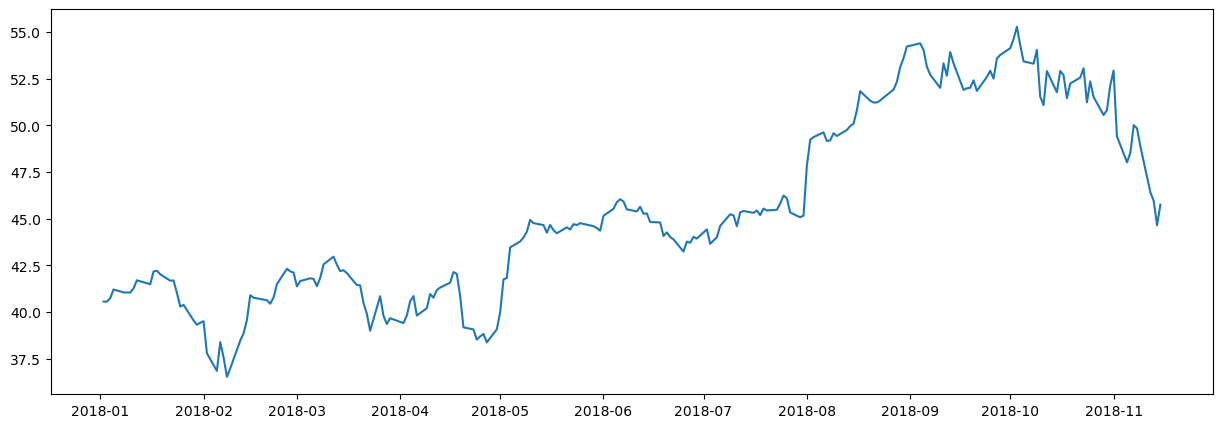

In [57]:
# Take the close price
close_price = stock_price['Close']

# Plot close stock price
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(close_price)
plt.show()

**Example 5.2\*:** Calculate the following metrics of the stock price. Visualize the daily return using histogram.
    
- The daily return (or the percentage change by day)
- The daily volatility of the stock (or the standard deviation of the daily return)

Reference:  
1. Percentage Change  
https://www.investopedia.com/terms/p/percentage-change.asp  
2. Volatility  
https://www.investopedia.com/terms/v/volatility.asp

In [58]:
# The returns ((today price - yesterday price) / yesterday price)
daily_return = close_price.pct_change()
daily_return.head()

Date
2018-01-02 00:00:00-05:00         NaN
2018-01-03 00:00:00-05:00   -0.000174
2018-01-04 00:00:00-05:00    0.004645
2018-01-05 00:00:00-05:00    0.011385
2018-01-08 00:00:00-05:00   -0.003714
Name: Close, dtype: float64

In [59]:
# The volatility (high value, high risk)
daily_volatility = np.std(daily_return)
daily_volatility

0.01650922842128725

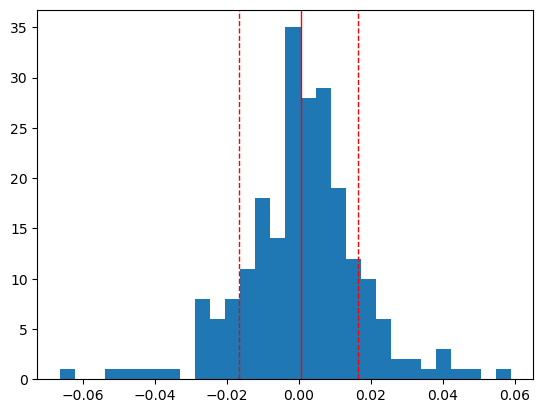

In [60]:
# Plot the distribution of the daily return
fig, ax = plt.subplots()
ax.hist(daily_return, bins=30)
ax.axvline(daily_return.mean(), color='red', linestyle='-', linewidth=1)
ax.axvline(-daily_return.std(), color='red', linestyle='--', linewidth=1)
ax.axvline(+daily_return.std(), color='red', linestyle='--', linewidth=1)
plt.show()

**Example 5.3\*:** Suppose that <u>the future daily return of Apple stock follows a normal distribution</u> with mean = 0 and standard deviation = volatility. Generate and plot the Apple stock price in the next 30 days (time horizon).

In [61]:
# Take the last close price
last_price = close_price.iloc[-1]

# Generate the stock price of next 30 days
time_horizon = 30
next_price = []

for n in range(time_horizon):
    
    # Generate the random percentage change around the mean (0) and std (daily_volatility)
    future_return = np.random.normal(0, daily_volatility)
    
    # Generate the random future price
    future_price = last_price * (1 + future_return)
    
    # Save the price and go next
    next_price.append(future_price)
    last_price = future_price
    
print(next_price)

[46.82934118258457, 47.32190273650943, 45.68899554563652, 45.946827510746495, 46.165916291874815, 46.00038782633483, 45.88232212492007, 45.318031008188264, 46.038640604781634, 46.0104818877443, 46.82494112317651, 47.07204753305938, 46.77826701335147, 46.12292479974155, 46.20559780814076, 47.51799834835696, 47.14761520660976, 47.093418071650206, 46.479777370973245, 45.14256630985581, 45.449907867018204, 45.627573672025534, 47.66188910505984, 47.77892796436636, 48.24618652786291, 47.59207305649768, 48.46863464073101, 47.63150380062816, 48.02776847662678, 48.918605864530846]


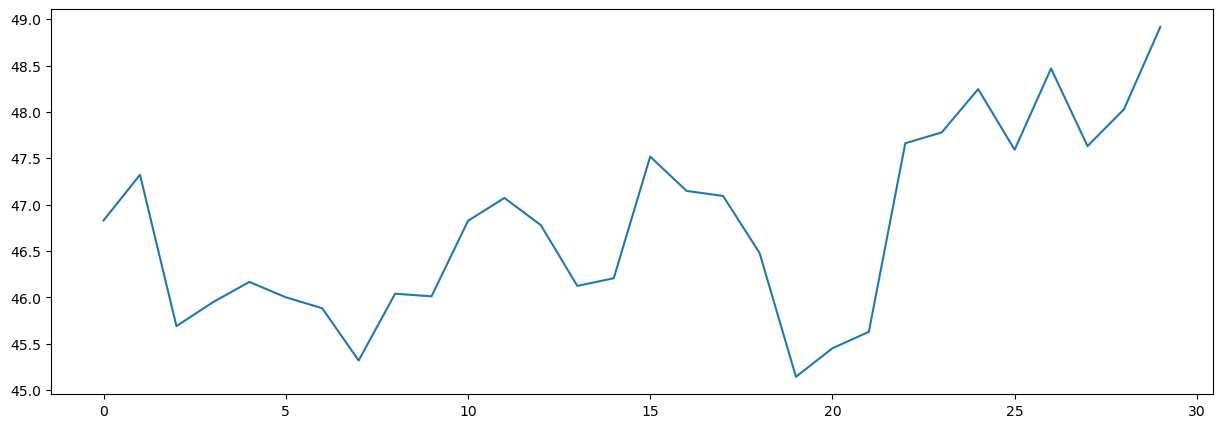

In [62]:
# Plot the future price in next 30 days
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(next_price)
plt.show()

**Example 5.4\*:** Run the simulation in Example 5.3 for 1000 times, with time horizone 200 days. Plot the results.

In [63]:
# Setup the Monte Carlo simulation
np.random.seed(123)
simulations = 1000
time_horizone = 200

# Run the simulation
simulation_df = pd.DataFrame()

for i in range(simulations):
    
    # The list to store the next stock price
    next_price = []
    
    # Create the next stock price
    last_price = close_price.iloc[-1]
    
    for j in range(time_horizone):
        # Generate the random percentage change around the mean (0) and std (daily_volatility)
        future_return = np.random.normal(0, daily_volatility)

        # Generate the random future price
        future_price = last_price * (1 + future_return)

        # Save the price and go next
        next_price.append(future_price)
        last_price = future_price
    
    # Store the result of the simulation
    next_price_df = pd.Series(next_price).rename('sim' + str(i))
    simulation_df = pd.concat([simulation_df, next_price_df], axis=1)

In [64]:
# Show the simulation data
print(simulation_df.shape)
simulation_df.iloc[:10, :5]

(200, 1000)


,sim0,sim1,sim2,sim3,sim4
0,44.935646,46.286997,46.914561,46.617364,45.664194
1,45.675529,45.829947,46.504130,46.010779,44.149960
2,45.888914,47.495036,46.127188,46.212251,43.478918
3,44.747760,48.034734,45.130226,45.928234,43.599677
4,44.320318,48.029732,45.123774,46.818863,42.649623
5,45.528665,47.865862,45.851459,47.051400,43.541331
6,43.704668,47.797490,44.525948,48.573191,43.897284
7,43.395194,47.075222,44.036483,47.704183,43.524609
8,44.302138,47.001232,44.062612,48.030125,43.366316
9,43.668209,47.217478,44.681011,48.067664,44.699092


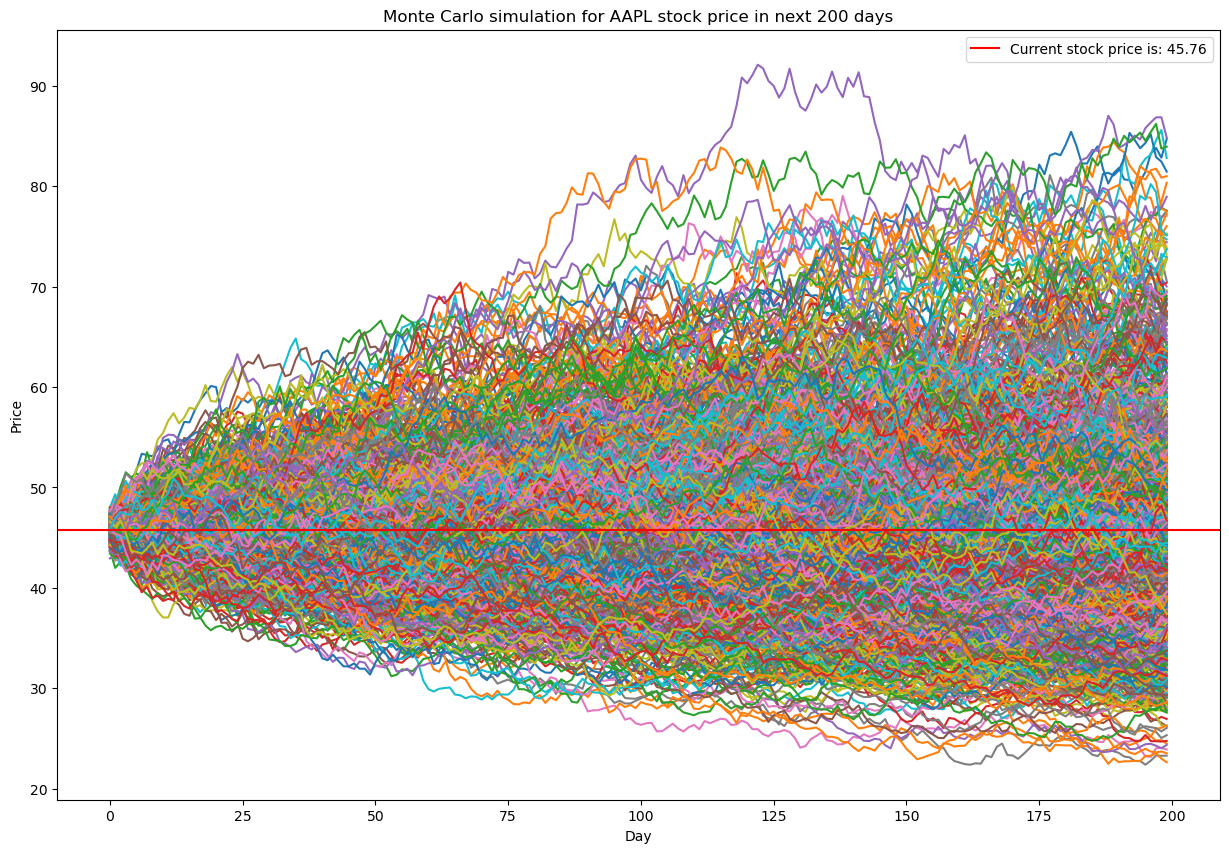

In [65]:
# Plot the simulation stock price in the future
fig, ax = plt.subplots(figsize=(15, 10))
# Plot the prices
ax.plot(simulation_df)
ax.axhline(y=close_price.iloc[-1], color='red')
# Customize the plot
ax.set_title('Monte Carlo simulation for AAPL stock price in next 200 days')
ax.set_xlabel('Day')
ax.set_ylabel('Price')
ax.legend(['Current stock price is: ' + str(np.round(close_price.iloc[-1], 2))])
ax.get_legend().legend_handles[0].set_color('red')
plt.show()

**Example 5.5\*:** Using the the simulation results, plot the histogram of the ending price of the 200th day.

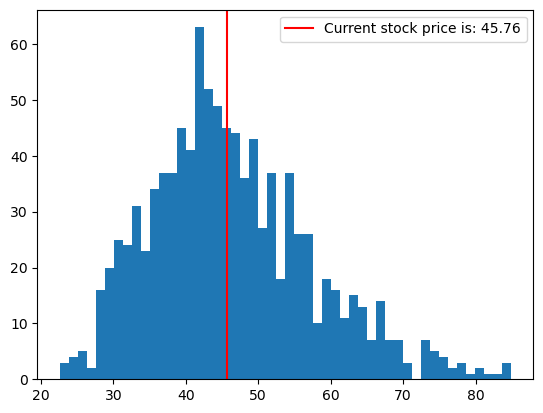

In [66]:
# Get the ending price of the 200th day
ending_price = simulation_df.iloc[-1:, :].values[0, ]

# Plot using histogram
fig, ax = plt.subplots()
ax.hist(ending_price, bins=50)
ax.axvline(x=close_price.iloc[-1], color='red')
ax.legend(['Current stock price is: ' + str(np.round(close_price.iloc[-1], 2))])
ax.get_legend().legend_handles[0].set_color('red')
plt.show()

**Example 5.6\*:** Use the simulation results in Example 5.4, calculate the Value at Risk (VaR) of the Apple stock at 95% confidence interval. VaR answers the question: What’s the worst possible scenario that can happen with the stock price? If so, how bad my loss can be (with 95% confidence)?.

Reference:  
1. Value At Risk - VaR  
https://www.investopedia.com/terms/v/var.asp  
2. What is Value at Risk (VAR)?  
https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/value-at-risk-var/  
3. Value At Risk Via A Monte Carlo Approach  
https://www.youtube.com/watch?v=_T0l015ecK4  

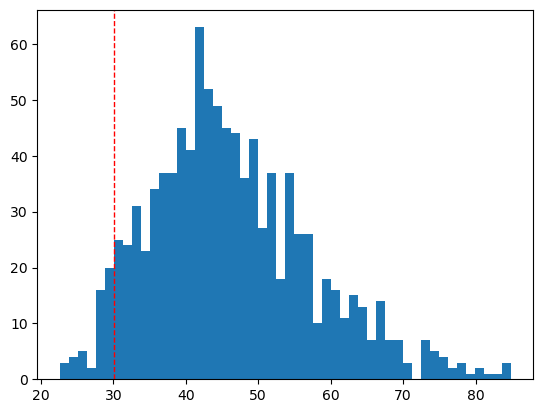

In [67]:
# Plot the distribution of the ending price
fig, ax = plt.subplots()
ax.hist(ending_price, bins=50)
ax.axvline(np.percentile(ending_price, 5), color='red', linestyle='--', linewidth=1)
plt.show()

In [68]:
# Price at 95% confidence interval
future_price_95ci = np.percentile(ending_price, 5)

# Value at Risk
# 95% of the time, the losses will not be more than 16.35 USD
VaR = close_price.iloc[-1] - future_price_95ci
print('VaR at 95% confidence interval is: ' + str(np.round(VaR, 2)) + ' USD')

VaR at 95% confidence interval is: 15.63 USD


## Part 3: Streamlit App

- Document: https://docs.streamlit.io/
- Gallery: https://streamlit.io/gallery
- To install, in Anaconda Prompt:  
&emsp;conda install -c conda-forge streamlit  
or:  
&emsp;pip install streamlit  

![Streamlit Dashboard](./img/streamlit.png)

## Part 4: Exercises

In [69]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Python user-defined function

**Exercise 1:** Write a function to create a list of cards for a standard 52-card deck.

![52 cards](./img/52-cards.jpg)

In [70]:
def DeckInit():
    """
    This function create a standard deck of 52-card.
    
    Input: none.
    
    Output: list of 52-card.
    """

    # 4 types of card
    suits = ['heart', 'diamond', 'club', 'spade']

    # 13 card ranks
    ranks = ['2', 'A', 'K', 'Q', 'J', '10', '9', '8', '7', '6', '5', '4', '3']

    # Create a list of cards
    cards = []
    for s in suits:
        for r in ranks:
            cards.append([s, r])
            
    return cards

cards = DeckInit()  # Initiate the card deck
print(len(cards))
print(cards)

52
[['heart', '2'], ['heart', 'A'], ['heart', 'K'], ['heart', 'Q'], ['heart', 'J'], ['heart', '10'], ['heart', '9'], ['heart', '8'], ['heart', '7'], ['heart', '6'], ['heart', '5'], ['heart', '4'], ['heart', '3'], ['diamond', '2'], ['diamond', 'A'], ['diamond', 'K'], ['diamond', 'Q'], ['diamond', 'J'], ['diamond', '10'], ['diamond', '9'], ['diamond', '8'], ['diamond', '7'], ['diamond', '6'], ['diamond', '5'], ['diamond', '4'], ['diamond', '3'], ['club', '2'], ['club', 'A'], ['club', 'K'], ['club', 'Q'], ['club', 'J'], ['club', '10'], ['club', '9'], ['club', '8'], ['club', '7'], ['club', '6'], ['club', '5'], ['club', '4'], ['club', '3'], ['spade', '2'], ['spade', 'A'], ['spade', 'K'], ['spade', 'Q'], ['spade', 'J'], ['spade', '10'], ['spade', '9'], ['spade', '8'], ['spade', '7'], ['spade', '6'], ['spade', '5'], ['spade', '4'], ['spade', '3']]


**Exercise 2:** You are playing a card game with 3 of your friends. Each of you draw 13 cards from a 52-card deck. What is the probability that you get at least 1 set Four of a Kind, e.g. A heart, A diamond, A club and A spade, etc.?

To solve this exercise, write these following Python functions:
- DeckInit() : Create a deck of 52-cards (Exercise 1).
- DrawCard() : Randomly draw 13 cards from the deck.
- CardSimulate() : Simulate the card game and check for Four of a Kind.

![4 cards set](./img/14-tien-len-mien-nam.png)

In [71]:
def DrawCard(cards, num=13):
    """
    This function process the drawing 13 cards.
    
    Input: list of 52-card.
    
    Output: list of 13 randomly drawing cards.
    """
    
    # Shuffle the deck
    np.random.shuffle(cards)
    
    # Draw 13 cards randomly
    draw_card = cards[:num]
    
    return draw_card

In [73]:
def CardSimulate(cards, n_times=10000):
    """
    This function carries out the card drawing process randomly.
    
    Input: list of cards, number of drawing times.
    
    Output: the probability of geting Four of a Kind.
    """

    suit_4 = 0

    for n in range(n_times):

        # Draw 13 cards randomly
        draw_card = DrawCard(cards, num=13)

        # Convert draw_card NumPy arrary to DataFrame
        draw_card_df = pd.DataFrame(draw_card, columns=['suit', 'rank'])

        # Check if there is Four of a Kind
        top_card_set = draw_card_df['rank'].value_counts().iloc[0]
        if top_card_set == 4:
            suit_4 += 1
            
    return suit_4 / n_times

In [74]:
# Main program
cards = DeckInit()  # Initiate card deck
prob = CardSimulate(cards, n_times=10000)  # Run the simulation 10000 times
print(prob)  # Print out result

0.0339


#### Apply user-defined function to DataFrame

**Exercise 3:** Working with the below cryptocurrency data set, use DataFrame.apply() function and user-defined function to create a new column named isFriday to check if the trading day is actually Friday or not.

In [75]:
# Import the Cryptocoins Historical Prices
cp = pd.read_csv('./data/CryptocoinsHistoricalPrices.csv', index_col=0)
cp = cp[-cp['Date'].isna()]  # Remove rows with error in Date
print(cp.head())

         Date     Open     High      Low    Close          Volume  \
1  2018-01-09  15123.7  15497.5  14424.0  14595.4  16,660,000,000   
2  2018-01-08  16476.2  16537.9  14208.2  15170.1  18,413,900,000   
3  2018-01-07  17527.3  17579.6  16087.7  16477.6  15,866,000,000   
4  2018-01-06  17462.1  17712.4  16764.6  17527.0  18,314,600,000   
5  2018-01-05  15477.2  17705.2  15202.8  17429.5  23,840,900,000   

        Market.Cap coin     Delta  
1  253,935,000,000  BTC -0.034932  
2  276,612,000,000  BTC -0.079272  
3  294,222,000,000  BTC -0.059889  
4  293,091,000,000  BTC  0.003717  
5  259,748,000,000  BTC  0.126140  


In [76]:
# Using user-defined function to create a new column named "isFriday"
def isFriday(day):
    return datetime.strptime(day, '%Y-%m-%d').weekday() == 4
cp['isFriday'] = cp['Date'].apply(isFriday)
cp.head()

,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,isFriday
1,2018-01-09,15123.7,15497.5,14424.0,14595.4,"16,660,000,000","253,935,000,000",BTC,-0.034932,False
2,2018-01-08,16476.2,16537.9,14208.2,15170.1,"18,413,900,000","276,612,000,000",BTC,-0.079272,False
3,2018-01-07,17527.3,17579.6,16087.7,16477.6,"15,866,000,000","294,222,000,000",BTC,-0.059889,False
4,2018-01-06,17462.1,17712.4,16764.6,17527.0,"18,314,600,000","293,091,000,000",BTC,0.003717,False
5,2018-01-05,15477.2,17705.2,15202.8,17429.5,"23,840,900,000","259,748,000,000",BTC,0.126140,True


#### Monte Carlo simulation

**Exercise 4:** Based on Example 5, write these following functions:
- **run_simulation**( stock_price, time_horizon, n_simulation, seed ) : Run the Monte Carlo simulation and output a the simulated prices in a DataFrame (e.g., simulation_df).
- **plot_simulation_price**( stock_price, simulation_df ) : Plot the simulated prices as line plot using the output of the previous function.
- **plot_simulation_hist**( stock_price, simulation_df ) : Plot the simulated prices as histogram using the output of the first function.
- **value_at_risk**( stock_price, simulation_df ) : Calculate the VaR of the stock using the simulated prices.

In [77]:
# Get the stock price from Yahoo Finance
import yfinance as yf
ticker = 'AAPL'          # Name of the stock
start_date='2020-01-01'  # First date to collect stock price
end_date='2020-11-05'    # Last date to collect stock price (NOTE: This date is excluded)
stock_price = yf.Ticker(ticker).history(start=start_date, end=end_date)  # NOTE: The last day is excluded
stock_price.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-10-29 00:00:00-04:00,109.813000,114.269234,109.646863,112.695869,146129200,0.0,0.0
2020-10-30 00:00:00-04:00,108.532809,109.441647,105.268815,106.382874,190272600,0.0,0.0
2020-11-02 00:00:00-05:00,106.627204,108.161479,104.877935,106.294937,122866900,0.0,0.0
2020-11-03 00:00:00-05:00,107.164668,108.953021,106.255830,107.926918,107624400,0.0,0.0
2020-11-04 00:00:00-05:00,111.542739,112.959741,109.793469,112.334305,138235500,0.0,0.0


In [78]:
# Defind the run_simulation() function
def run_simulation(stock_price, time_horizon, n_simulation, seed):
    """
    This function run the Monte Carlo simulation using the input parameters.
    
    Input:
        - stock_price : A DataFrame store the stock price (from Yahoo Finance)
        - time_horizon : Period of the simulation (in days)
        - n_simulation : Number of simulations
        - seed : The ramdom seed
        
    Output:
        - simulation_df : A DataFrame stores the simulated prices
    """
    
    # Calculate some financial metrics for the simulation
    # Daily return (of close price)
    daily_return = stock_price['Close'].pct_change()
    # Daily volatility (of close price)
    daily_volatility = np.std(daily_return)

    # Run the simulation
    np.random.seed(seed)
    simulation_df = pd.DataFrame()  # Initiate the data frame

    for i in range(n_simulation):

        # The list to store the next stock price
        next_price = []

        # Create the next stock price
        last_price = stock_price['Close'].iloc[-1]

        for j in range(time_horizon):

            # Generate the random percentage change around the mean (0) and std (daily_volatility)
            future_return = np.random.normal(0, daily_volatility)

            # Generate the random future price
            future_price = last_price * (1 + future_return)

            # Save the price and go next
            next_price.append(future_price)
            last_price = future_price

        # Store the result of the simulation
        next_price_df = pd.Series(next_price).rename('sim' + str(i))
        simulation_df = pd.concat([simulation_df, next_price_df], axis=1)

    return simulation_df

# Test the function
simulation_df = run_simulation(stock_price=stock_price,
                               time_horizon=30,
                               n_simulation=1000,
                               seed=123)
# Print out simulated data
simulation_df.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim990,sim991,sim992,sim993,sim994,sim995,sim996,sim997,sim998,sim999
25,120.619291,107.048412,102.052770,112.381974,129.450175,105.929121,100.905096,91.035999,117.196796,71.813772,...,100.463573,127.826898,108.602455,125.006240,101.068831,174.678449,93.925530,121.942157,127.904375,114.909921
26,124.021145,110.012943,99.728690,107.591715,131.286572,106.941489,100.633650,93.958374,119.514057,76.002052,...,101.477857,136.259714,109.617208,123.840821,101.352532,175.298528,91.410638,123.944473,126.285885,116.447980
27,118.512153,116.015468,95.969005,106.479524,137.591236,104.909184,97.769794,93.390640,120.571604,76.984345,...,106.165952,129.291212,103.124886,128.595224,104.655712,169.042572,94.378117,117.904842,125.933533,112.303457
28,117.996039,121.410394,102.196570,112.966360,136.565954,103.631806,97.480396,95.115614,125.141275,77.368617,...,102.943665,122.192796,100.877298,126.670876,106.375316,169.493964,93.252012,119.678330,126.970391,110.649512
29,114.834544,125.447167,102.719073,105.853812,137.174444,104.082825,98.325033,94.526782,126.776121,79.340554,...,103.855853,122.798429,97.645194,127.189221,107.929818,172.346506,93.628187,122.108092,131.157710,116.360051


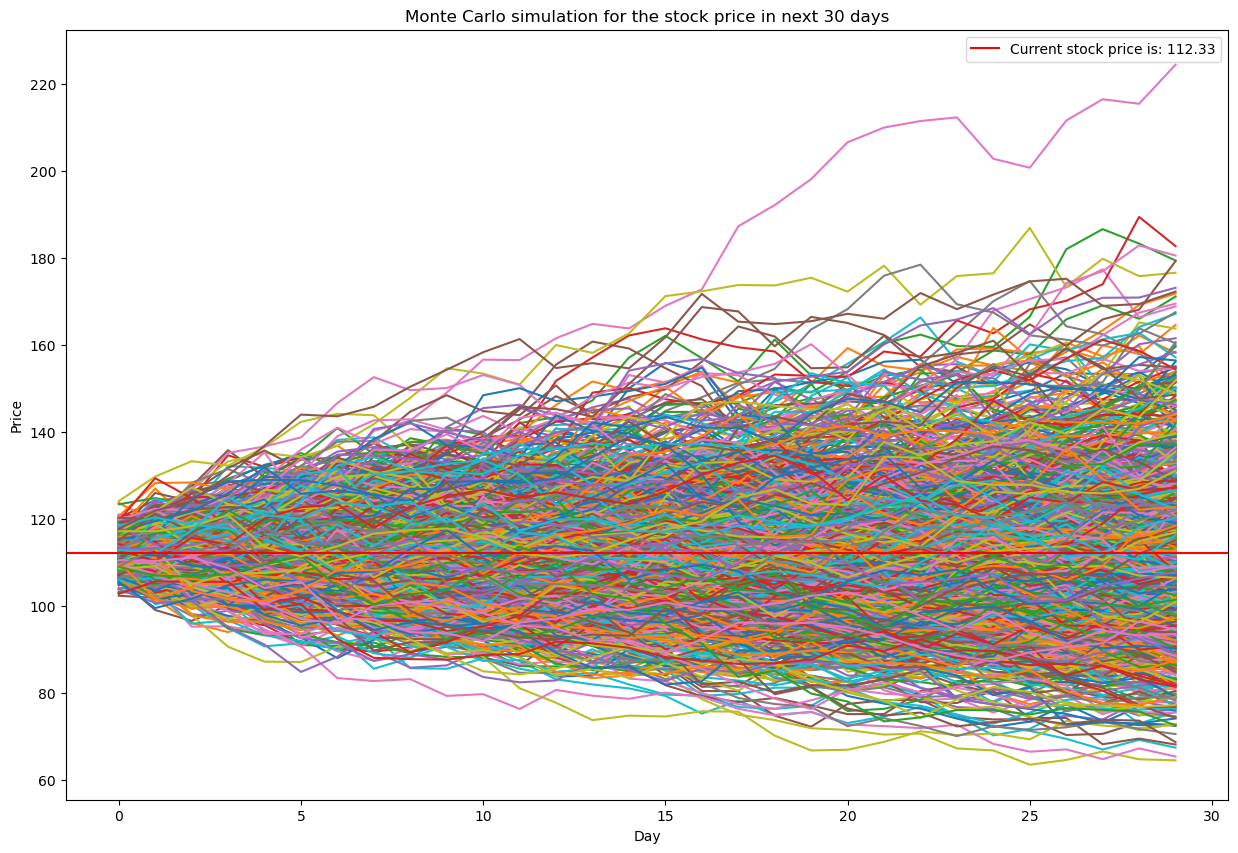

In [79]:
# Defind the plot_simulation_price() function:
def plot_simulation_price(stock_price, simulation_df):
    """
    This function plot the simulated stock prices using line plot.
    
    Input:
        - stock_price : A DataFrame store the stock price (from Yahoo Finance)
        - simulation_df : A DataFrame stores the simulated prices
        
    Output:
        - Plot the stock prices
    """
        
    # Plot the simulation stock price in the future
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(simulation_df)
    ax.set_title('Monte Carlo simulation for the stock price in next ' + str(simulation_df.shape[0]) + ' days')
    ax.set_xlabel('Day')
    ax.set_ylabel('Price')
    ax.axhline(y=stock_price['Close'].iloc[-1], color='red')
    ax.legend(['Current stock price is: ' + str(np.round(stock_price['Close'].iloc[-1], 2))])
    ax.get_legend().legend_handles[0].set_color('red')
    plt.show()
    
# Test the function
plot_simulation_price(stock_price, simulation_df)

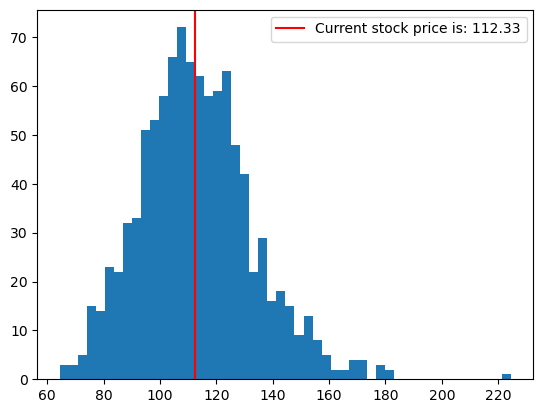

In [80]:
# Defind the plot_simulation_hist() function:
def plot_simulation_hist(stock_price, simulation_df):
    """
    This function plot the simulated stock prices using histogram plot.
    
    Input:
        - stock_price : A DataFrame store the stock price (from Yahoo Finance)
        - simulation_df : A DataFrame stores the simulated prices
        
    Output:
        - Plot the stock prices using histogram
    """
        
    # Get the simulated prices at the last day
    ending_price = simulation_df.iloc[-1:, :].values[0, ]

    # Plot using histogram
    fig, ax = plt.subplots()
    ax.hist(ending_price, bins=50)
    ax.axvline(x=stock_price['Close'].iloc[-1], color='red')
    ax.legend(['Current stock price is: ' + str(np.round(stock_price['Close'].iloc[-1], 2))])
    ax.get_legend().legend_handles[0].set_color('red')
    plt.show()
    
# Test the function
plot_simulation_hist(stock_price, simulation_df)

In [81]:
# Defind the value_at_risk() function:
def value_at_risk(stock_price, simulation_df):
    """
    This function calculate the Value at Risk (VaR) of the stock based on the Monte Carlo simulation.
    
    Input:
        - stock_price : A DataFrame store the stock price (from Yahoo Finance)
        - simulation_df : A DataFrame stores the simulated prices
        
    Output:
        - VaR value
    """
        
    # Price at 95% confidence interval
    future_price_95ci = np.percentile(simulation_df.iloc[-1:, :].values[0, ], 5)

    # Value at Risk
    VaR = stock_price['Close'].iloc[-1] - future_price_95ci
    print('VaR at 95% confidence interval is: ' + str(np.round(VaR, 2)) + ' USD')
    
# Test the function
value_at_risk(stock_price, simulation_df)

VaR at 95% confidence interval is: 30.31 USD
